In [1]:
from sklearn.datasets import load_digits

In [4]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn import metrics

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [18]:
import numpy as np

In [19]:
digits = load_digits()

In [20]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [21]:
digits.data.shape

(1797, 64)

In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
plt.figure(figsize=(20,4))

<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

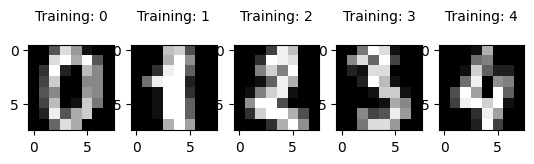

In [30]:
for index, (img, label) in enumerate(zip(digits.data[:5], digits.target[:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(img, (8, 8)), cmap=plt.cm.grey)
    plt.title("Training: %i\n"%label, fontsize=10)
            

In [31]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [32]:
x_train

array([[ 0.,  0., 11., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  9.,  0.],
       [ 0.,  0.,  0., ..., 14.,  5.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15.,  4.,  0.],
       [ 0.,  0.,  6., ..., 16., 16., 12.],
       [ 0.,  3., 14., ...,  0.,  0.,  0.]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
reg = LogisticRegression()

In [37]:
reg.fit(x_train, y_train)

C:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
reg.predict(x_test[0].reshape(1, -1))

array([4])

In [41]:
reg.score(x_test, y_test)

0.9516908212560387

In [43]:
plt.figure(figsize= (9,9))

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [55]:
cm = metrics.confusion_matrix(y_test, reg.predict(x_test))

In [56]:
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

Text(0.5, 1.0, 'Actual score: 0.9516908212560387')

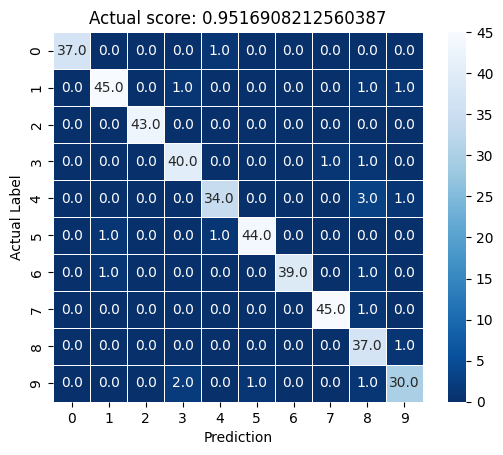

In [59]:
sns.heatmap(cm, annot=True,fmt=".1f",linewidths=.5,square=True,cmap= "Blues_r")
plt.xlabel("Prediction")
plt.ylabel("Actual Label")
plt.title(f"Actual score: {reg.score(x_test, y_test)}")

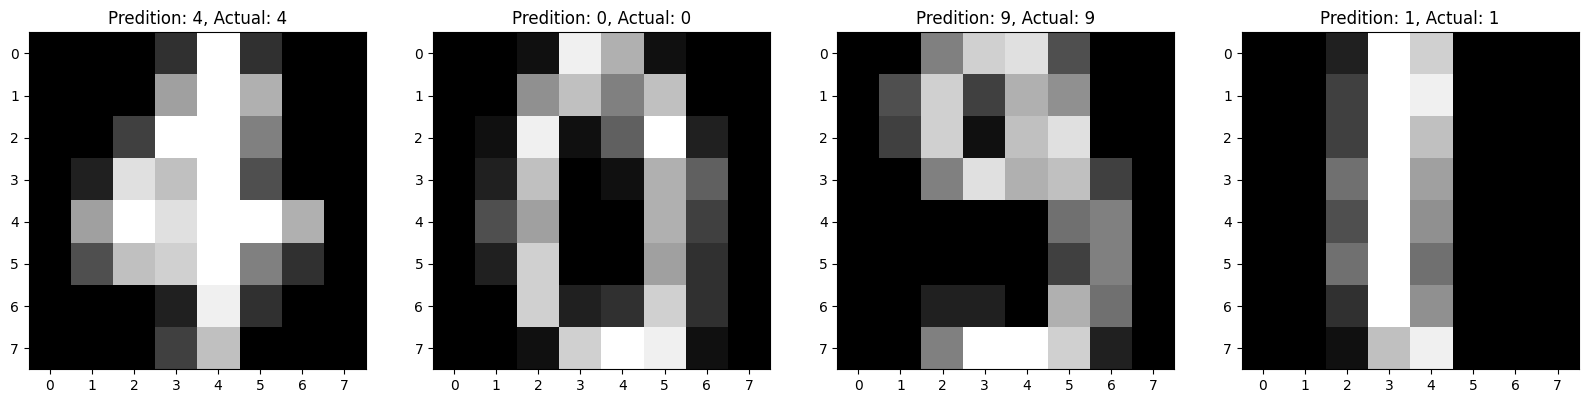

In [64]:
prediction = reg.predict(x_test)
index = 0
classified_index = []
for predict, actual in zip(prediction, y_test):
    if predict == actual:
        classified_index.append(index)
    index+=1

plt.figure(figsize= (20,5))
for index, wrong in enumerate(classified_index[:4]):
    plt.subplot(1, 4, index+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.grey)
    plt.title(f'Predition: {prediction[wrong]}, Actual: {y_test[wrong]}')